# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
from PIL import Image
from PIL import ImageDraw
import cv2 as cv
import numpy as np
import pytesseract as pyt
import io

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!


def OCR(search_str, PIL_Instance, cvImg, imgdict):
    unzip_lst = []
    text=pyt.image_to_string(PIL_Instance)
    if search_str in text:
        #Invoke faces
        #face_rec(PIL_Img, cvImg, imgdict)
        return_str = 'Results found in file {}'.format(imgfilename(PIL_Instance, imgdict))
        return return_str, True
        
    else:
        return_str = "It's NOT in {}".format(imgfilename(PIL_Instance, imgdict))
        return return_str, False


def face_rec(PIL_Instance, cvImg, imgdict):

    faces = face_cascade.detectMultiScale(cvImg, 1.70)

    if len(faces.tolist()) == 0:
        return 'Results found in {}\nBut there is no faces in that file!'.format(imgfilename(PIL_Instance, imgdict))
    
    else:
        # Lets create a PIL image object

        # one variable for the X dimension, and one for the Y dimension.
        x=0
        y=0
        
        img_array = []
        for x,y,w,h in faces:
            PIL_Img = PIL_Instance.crop((x,y,x+w,y+h)).resize((100,110))
            img_array.append(PIL_Img)
            #display(crop_img.resize((100,110)))
    
        first_image = img_array[0]
        #create contact sheet
        if len(img_array)/5 == 0:
            contact_sheet=Image.new(first_image.mode, (5*first_image.width, (len(img_array)/5)*first_image.height))
        else:
            contact_sheet=Image.new(first_image.mode, (5*first_image.width, (int(len(img_array)/5)+1)*first_image.height))     

        # Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
        # just solid black. Instead we want to just deal with the images after the first one, and that should
        # give us nine in total
        m=0
        n=0
        for img in img_array:
            # Lets paste the current image into the contact sheet
            contact_sheet.paste(img, (m,n))
            # Now we update our X position. If it is going to be the width of the image, then we set it to 0
            # and update Y as well to point to the next "line" of the contact sheet.
            if m+first_image.width == contact_sheet.width:
                m=0
                n=n+first_image.height
            else:
                m=m+first_image.width

        # numbers into integers using the int() function.
        contact_sheet = contact_sheet.resize((int(contact_sheet.width),int(contact_sheet.height) ))
        display(contact_sheet)


#To create a dict of PIL images
def create_PIL_dict(filename_lst, PyZipObj):
    
    imgdict = {}

    #For loop to iterate through the namelist
    for img_file in filename_lst:
        #Open the zipped file as a PIL Image object
        PIL_Instance=zip2PIL(img_file, PyZipObj)
        #Create a dict of [filename]: PIL_obj
        imgdict[img_file] = PIL_Instance
    
    return imgdict


def zip2PIL(filename, PyZipObj):
    #To convert a zipped subfile into a PIL object
    image_data = PyZipObj.read(filename)
    fh = io.BytesIO(image_data)
    PIL_Img = Image.open(fh)
    return PIL_Img


#convert PIL object to CV image
def PIL2cvImg(PIL_Instance):
    cvImg = cv.cvtColor(np.array(PIL_Instance), cv.COLOR_RGB2BGR)
    return cvImg


# Return imgdict's key using PIL_obj
def imgfilename(PIL_Instance, dic):
    #count = 0
    for i in range(len(dic.items())):
        if PIL_Instance == list(dic.items())[i][1]:
    #        count+=1
            return list(dic.keys())[i]
        else:
            pass

        
#Main program
def main(search_str):
    
    #Create a PyZipFile object
    smallfile=zipfile.PyZipFile("readonly/small_img.zip")

    #Return a list of file names within the zip file
    filename_lst = smallfile.namelist()

    #create PIL dict
    imgdict = create_PIL_dict(filename_lst, smallfile)

    for filename in filename_lst:
        #Convert zipped file as a PIL Image object
        PIL_Instance=imgdict[filename]

        #Convert PIL Image object to cvImage object
        cvImg = PIL2cvImg(PIL_Instance)

        #Invoke OCR function
        return_str, str_result = OCR(search_str, PIL_Instance, cvImg, imgdict)

        #Invoke facial recognition function
        if str_result:
            print(return_str)
            face_rec(PIL_Instance, cvImg, imgdict)
        else:
            print(return_str)


Please input a search string: Mark
Results found in file a-0.png


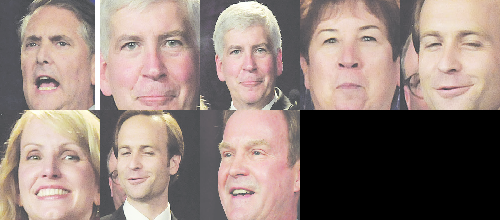

Results found in file a-1.png


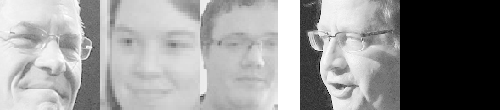

Results found in file a-2.png


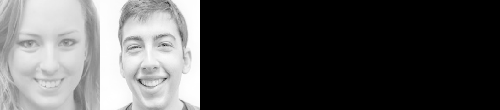

Results found in file a-3.png


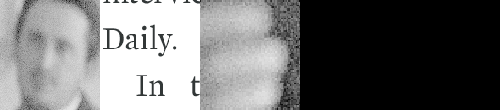

In [2]:
#Enter search string
search_str = input('Please input a search string: ')
main(search_str)

Please input a search string: Christopher
Results found in file a-0.png


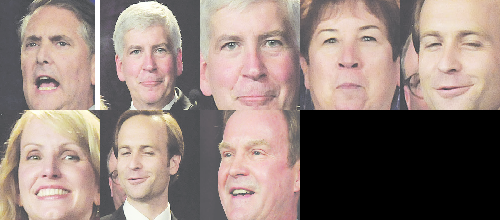

It's NOT in a-1.png
It's NOT in a-2.png
Results found in file a-3.png


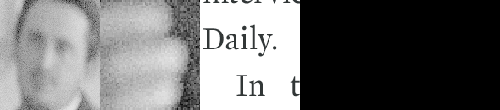

In [3]:
#Enter search string
search_str = input('Please input a search string: ')
main(search_str)